# **Linear Regresion**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \
```linear_regression``` module documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

In [ ]:
import numpy as np # Librería matematica
import matplotlib.pyplot as plt # plots graficar
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python

(80,)
(80,)


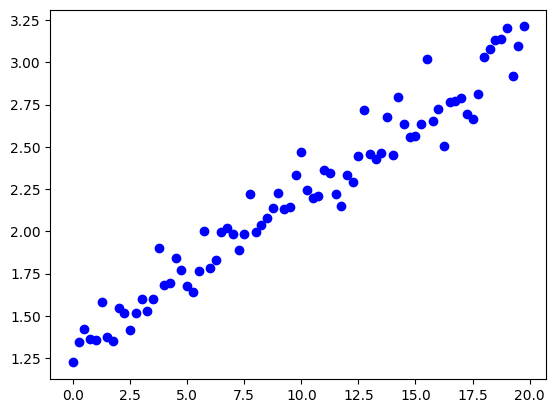

In [ ]:
def f(x) : # Recrear el comportamiento de una funcion lineal
  y = (0.0918 * x) + 1.2859 + 0.1*np.random.randn (x.shape[0]) # Comportamiento lineal (w*x + b + ruido)
  return y

# Crear datos de entrenamiento.
x = np.arange (0, 20, 0.25); print (x.shape)
# Generar etiquetas para cada x
y =f(x); print (y.shape)

# Diagrama de dispersion
plt.scatter(x, y, color = 'blue')

In [ ]:
# Instancia de la regresión lineal
linear_regression = LinearRegression()

# Entrenar el modelo de regresión lineal
linear_regression.fit(x.reshape(-1, 1), y)  # Usar x como entrada y y como salida

# Imprimir los valores estimados para compararlos respecto a los originales
print("w = " + str(linear_regression.coef_) + ", b = " + str(linear_regression.intercept_))


w = [0.09002002], b = 1.3164404561338812


In [ ]:
# Nueva muestra. Imprime el valor correspondiente de y
new_sample = np.array([5])
print(f(new_sample))

# Predecir la nueva muestra. Imprimir la predicción
prediction = linear_regression.predict(new_sample.reshape(-1, 1))
print(prediction)


[1.67289158]
[1.76654056]


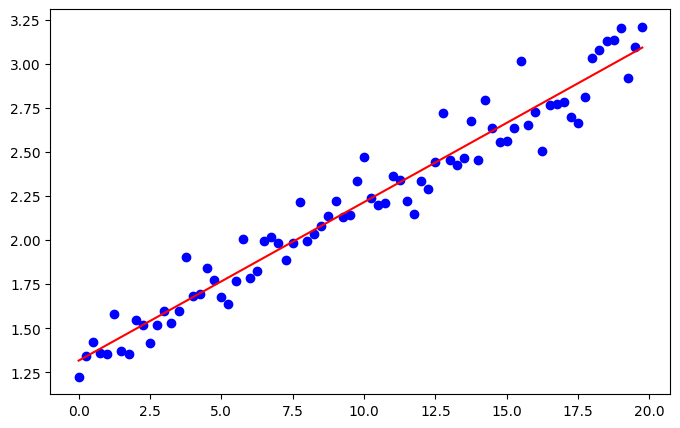

In [ ]:
# Predecir todos los valores de x
predictions = linear_regression.predict(x.reshape(-1, 1))

# Dibuja los valores del las muestras (azul) y de prediccion (rojo)
_, ax = plt.subplots (figsize=(8,5))
ax.scatter(x, y, color = 'blue')
ax.plot (x, predictions, color = 'red')

## In real data

```datasets``` module info [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # plots
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python
from sklearn.datasets import load_diabetes

In [ ]:
# Cargar la base de datos Diabetes
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
print(diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, 2]
diabetes_X = diabetes_X[:, np.newaxis]
print(diabetes_X.shape, diabetes_y.shape)

(442, 1) (442,)


In [ ]:
# Linear regression
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(diabetes_X,diabetes_y)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = linear_regression.predict(diabetes_X)

# Imprimir el coeficiente y el intercepto del modelo
print("w = " + str(linear_regression.coef_) + ", b = " + str(linear_regression.intercept_))


w = [949.43526038], b = 152.13348416289617


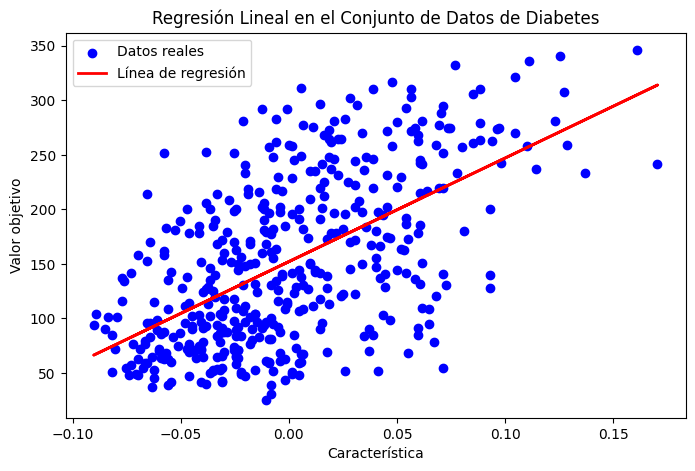

In [ ]:
# Plot outputs
_, ax = plt.subplots(figsize=(8, 5))
ax.scatter(diabetes_X, diabetes_y, color="blue", label="Datos reales")
ax.plot(diabetes_X, diabetes_y_pred, color="red", linewidth=2, label="Línea de regresión")
ax.set_xlabel("Característica")
ax.set_ylabel("Valor objetivo")
ax.set_title("Regresión Lineal en el Conjunto de Datos de Diabetes")
ax.legend()
plt.show()


# **Logistic Regresion**

Iris dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \\
```linear_regression``` module [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
iris = load_iris() # Cargar la base de datos iris
iris_x = iris.data[:, :2] # Caracteristicas. Seleccionamos 2
iris_y = iris.target # Etiquetas

# Imprimir formas
print (iris_x.shape, iris_y.shape)

(150, 2) (150,)


In [ ]:
# Instancia de la regresion logistica
logistic_regression = LogisticRegression()

# Entrenar el modelo de regresion logistica
logistic_regression.fit (iris_x,iris_y) #(#muestras, #caracteristicas)

LogisticRegression()

### **Decision boundaries**

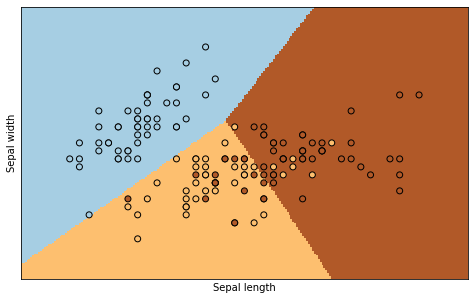

In [ ]:
# Valores mínimos y máximos para crear el grid de las fronteras de decisión
x_min, x_max = iris_x[:, 0].min(), iris_x[:, 0].max()
y_min, y_max = iris_x[:, 1].min(), iris_x[:, 1].max()

# Crear el grid de las fronteras de decisión
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir los valores del grid
predictions = logistic_regression.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

# Reshape de las predicciones para el formato correcto del grid
predictions = predictions.reshape(x_grid.shape)

print(predictions.shape)

(241, 361)


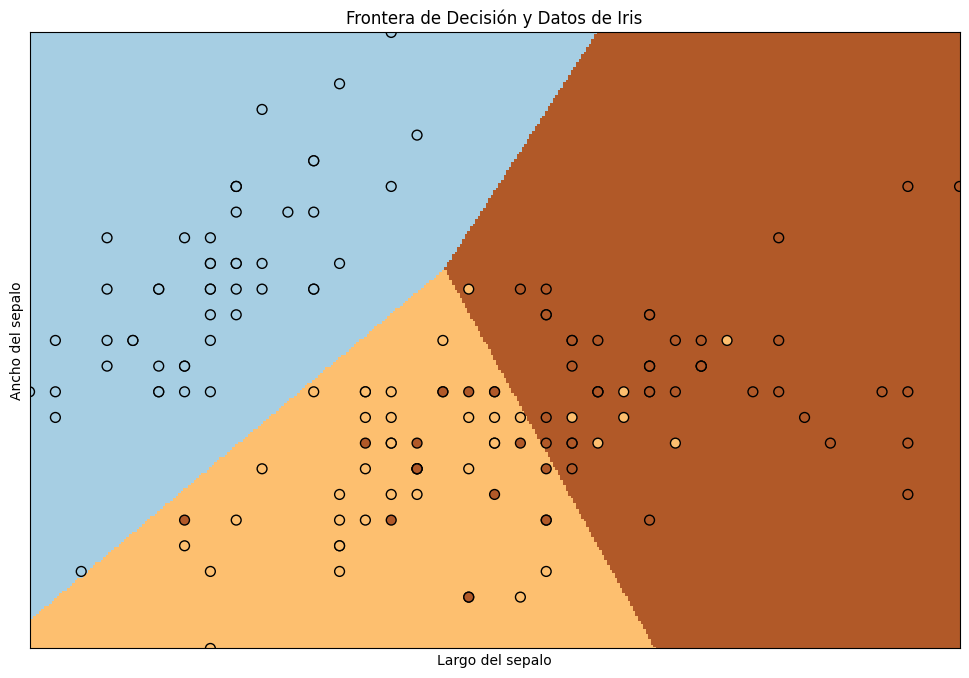

In [ ]:

# Dibujar el grid y las fronteras de decisión
_, ax = plt.subplots(figsize=(12, 8))  # Aumentar el tamaño de la figura
cax = ax.pcolormesh(x_grid, y_grid, predictions, cmap=plt.cm.Paired, shading='auto')

# Imprimir las muestras con el scatter
scatter = ax.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired, s=50)


# Ajustar los límites para que el gráfico sea más amplio
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Opcional: Ajustar etiquetas y título
ax.set_xlabel('Largo del sepalo')
ax.set_ylabel('Ancho del sepalo')
ax.set_title('Frontera de Decisión y Datos de Iris')

# Eliminar marcas de los ejes
ax.set_xticks(())
ax.set_yticks(())

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
from sklearn.datasets import load_iris

# Cargar la base de datos iris
iris = load_iris()


iris_x = iris.data  # características
iris_y = iris.target  # Etiquetas


print(iris_x.shape, iris_y.shape)


(150, 4) (150,)


In [ ]:
# Instancia de la regresion logistica
logistic_regression = LogisticRegression(max_iter=200)

# Entrenar el modelo de regresion logistica
logistic_regression.fit (iris_x,iris_y) #(#muestras, #caracteristicas)

LogisticRegression(max_iter=200)

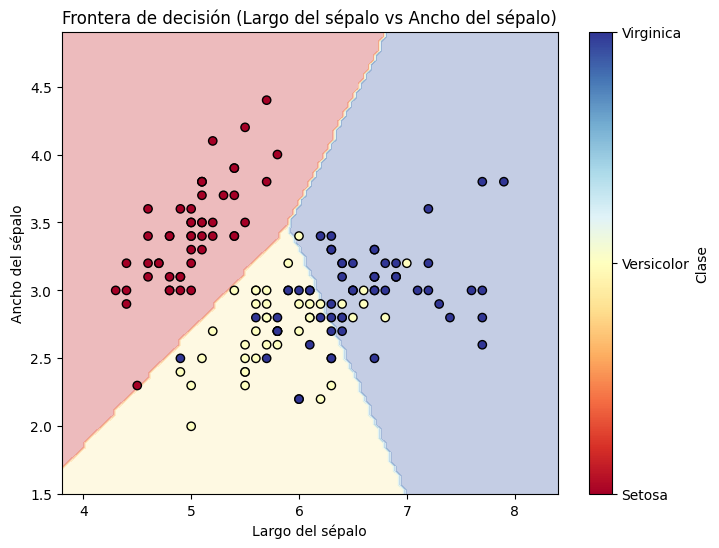

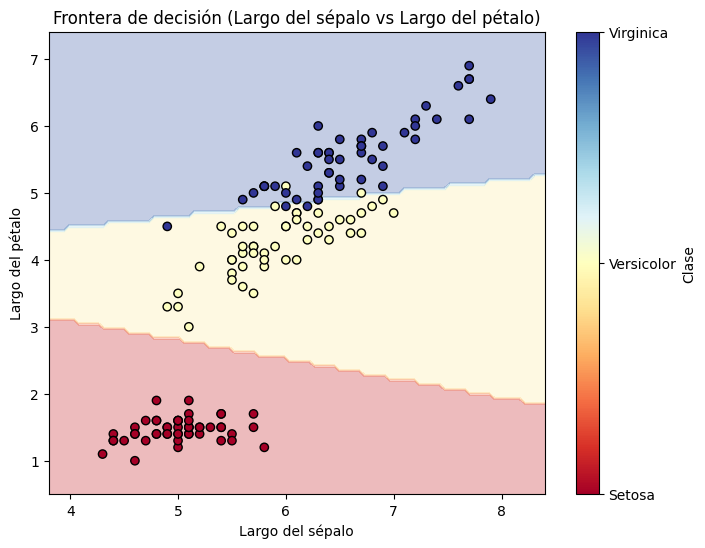

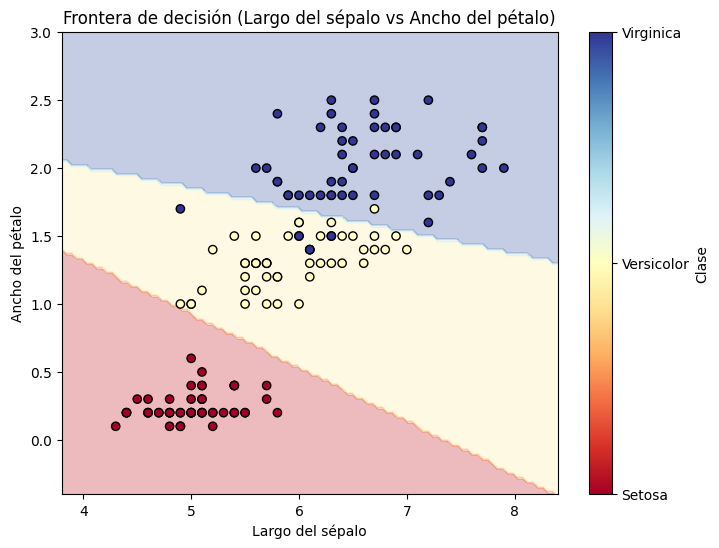

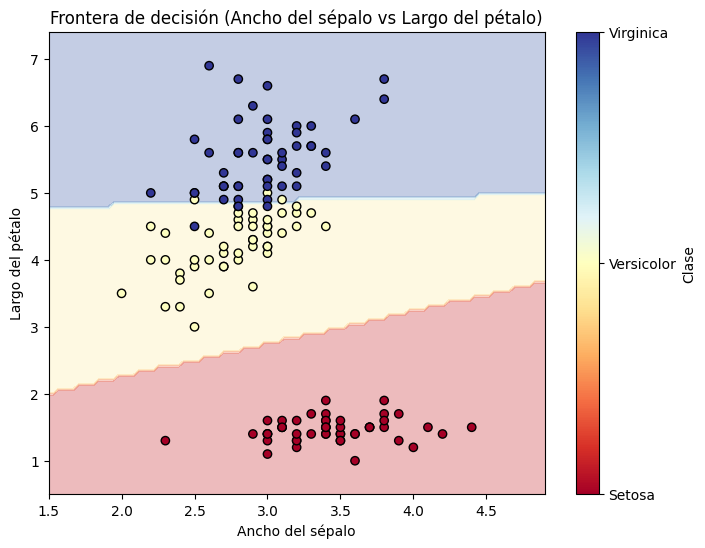

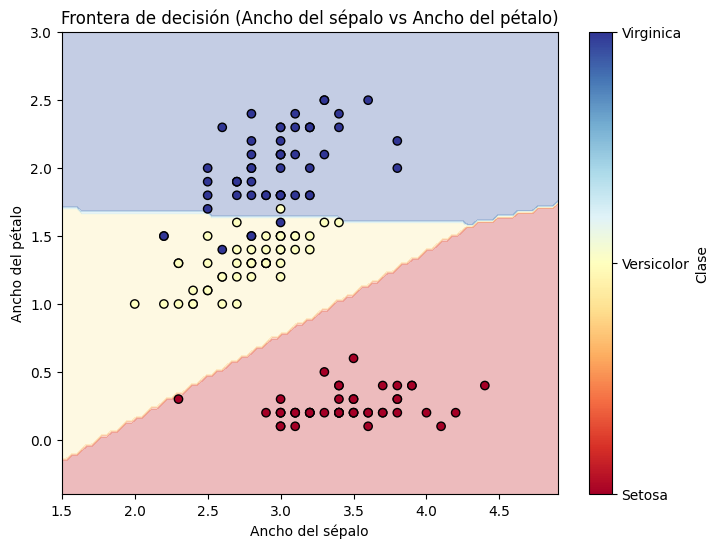

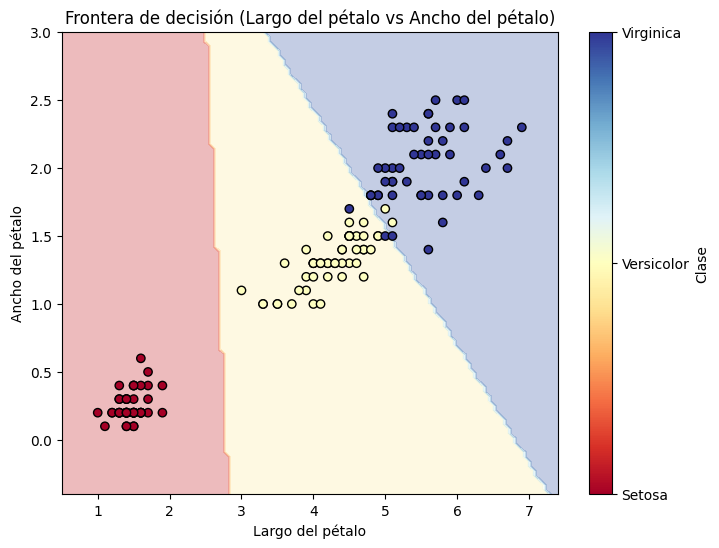

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import itertools

# Cargar la base de datos iris
iris = load_iris()
iris_x = iris.data
iris_y = iris.target

# Nombres de las características
feature_names = [
    'Largo del sépalo',
    'Ancho del sépalo',
    'Largo del pétalo',
    'Ancho del pétalo'
]

# Número de características
num_features = iris_x.shape[1]

# Crear gráficos de pares de características
for i, j in itertools.combinations(range(num_features), 2):
    # Seleccionar dos características para el gráfico
    x = iris_x[:, [i, j]]

    # Instanciar y entrenar el modelo
    logistic_regression = LogisticRegression(max_iter=500)
    logistic_regression.fit(x, iris_y)

    # Valores mínimos y máximos para crear el grid de las fronteras de decisión
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5

    # Crear el grid de las fronteras de decisión
    x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predecir los valores del grid
    predictions = logistic_regression.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
    predictions = predictions.reshape(x_grid.shape)

    # Visualizar la frontera de decisión
    plt.figure(figsize=(8, 6))
    plt.contourf(x_grid, y_grid, predictions, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(x[:, 0], x[:, 1], c=iris_y, edgecolor='k', cmap=plt.cm.RdYlBu)

    # Etiquetas de los ejes
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title(f'Frontera de decisión ({feature_names[i]} vs {feature_names[j]})')

    # Agregar la barra de colores
    cbar = plt.colorbar(label='Clase')
    cbar.set_ticks([0, 1, 2])
    cbar.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])

    plt.show()


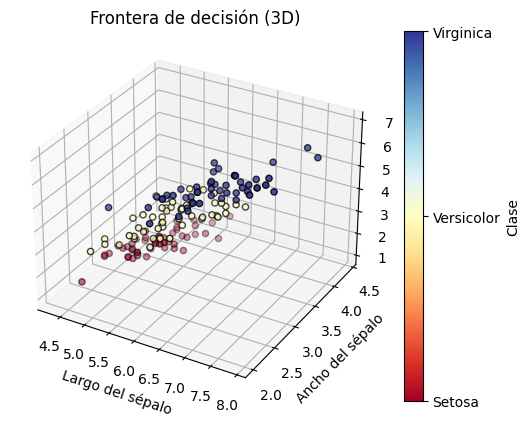

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Cargar la base de datos iris
iris = load_iris()
iris_x = iris.data[:, :3]  # Usar solo las primeras tres características
iris_y = iris.target

# Instanciar y entrenar el modelo
logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(iris_x, iris_y)

# Crear un grid 3D
x_min, x_max = iris_x[:, 0].min() - 0.5, iris_x[:, 0].max() + 0.5
y_min, y_max = iris_x[:, 1].min() - 0.5, iris_x[:, 1].max() + 0.5
z_min, z_max = iris_x[:, 2].min() - 0.5, iris_x[:, 2].max() + 0.5

x_grid, y_grid, z_grid = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100),
    np.linspace(z_min, z_max, 100)
)

# Predecir los valores del grid
grid_points = np.c_[x_grid.ravel(), y_grid.ravel(), z_grid.ravel()]
predictions = logistic_regression.predict(grid_points)

# Reshape de las predicciones para el formato correcto del grid
predictions = predictions.reshape(x_grid.shape)

# Visualizar la frontera de decisión en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de los datos
scatter = ax.scatter(iris_x[:, 0], iris_x[:, 1], iris_x[:, 2], c=iris_y, edgecolor='k', cmap=plt.cm.RdYlBu)

# Etiquetas de los ejes
ax.set_xlabel('Largo del sépalo')
ax.set_ylabel('Ancho del sépalo')
ax.set_zlabel('Largo del pétalo')

plt.title('Frontera de decisión (3D)')

# Agregar la barra de colores
cbar = plt.colorbar(scatter, ax=ax, label='Clase')

# Crear la leyenda personalizada
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])

plt.show()



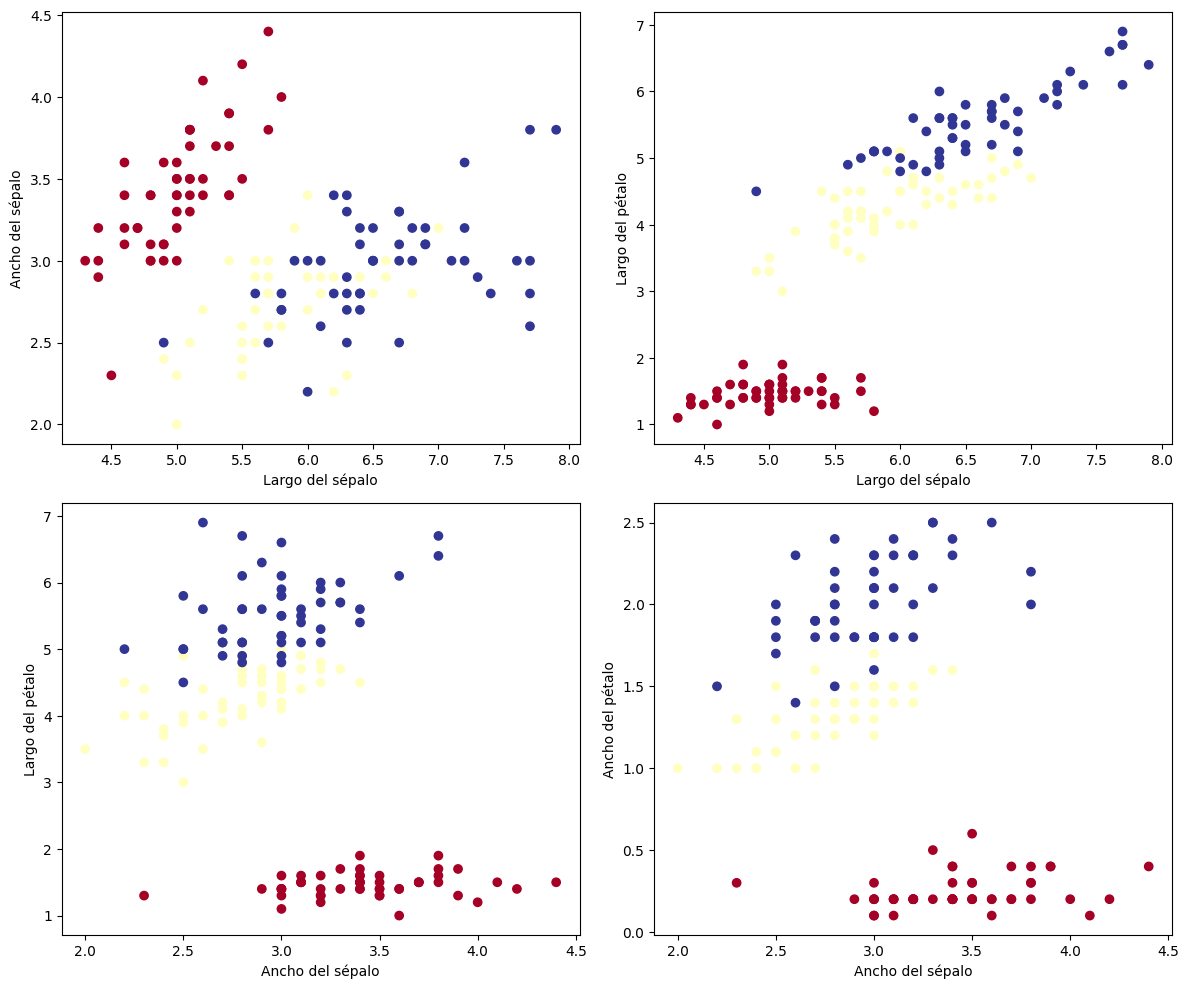

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Graficar pares de características
axs[0, 0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='RdYlBu')
axs[0, 0].set_xlabel('Largo del sépalo')
axs[0, 0].set_ylabel('Ancho del sépalo')

axs[0, 1].scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target, cmap='RdYlBu')
axs[0, 1].set_xlabel('Largo del sépalo')
axs[0, 1].set_ylabel('Largo del pétalo')

axs[1, 0].scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target, cmap='RdYlBu')
axs[1, 0].set_xlabel('Ancho del sépalo')
axs[1, 0].set_ylabel('Largo del pétalo')

axs[1, 1].scatter(iris.data[:, 1], iris.data[:, 3], c=iris.target, cmap='RdYlBu')
axs[1, 1].set_xlabel('Ancho del sépalo')
axs[1, 1].set_ylabel('Ancho del pétalo')

plt.tight_layout()
plt.show()
